# MNIST dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Resources:
- [MNIST explained](http://yann.lecun.com/exdb/mnist/index.html)
- [Convolutional vs Feedforward](https://www.baeldung.com/cs/convolutional-vs-regular-nn)
- [IBM Neural Networkss](https://www.ibm.com/topics/convolutional-neural-networks)

In [190]:
# Required Imports
# %pip install scikit-learn
# %pip install tensorflow
# %pip install keras
# %pip install numpy

In [191]:
# Presentational Imports
# %pip install matplotlib
# %pip install tabulate
# %pip install pillow
# %pip install sympy

In [115]:
# Primary Libraries
import numpy as np
from keras.datasets import mnist

In [116]:
# Visualization and Pretty Prints
from tabulate import tabulate
from PIL import Image
import matplotlib.pyplot as plt

## Data Exploration

In [117]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [118]:
# Print the shape of the training and test datasets
table = tabulate([
    ["Training data shape", x_train.shape, "28 x 28 pixels images"],
    ["Traning labels shape", y_train.shape, "numerical value (0-9)"],
    ["Test data shape:", x_test.shape, "28 x 28 pixel images"],
    ["Test labels shape:", y_test.shape, "numerical value (0-9)"]
], tablefmt='fancy_grid')

print(table)

╒══════════════════════╤═════════════════╤═══════════════════════╕
│ Training data shape  │ (60000, 28, 28) │ 28 x 28 pixels images │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Traning labels shape │ (60000,)        │ numerical value (0-9) │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Test data shape:     │ (10000, 28, 28) │ 28 x 28 pixel images  │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Test labels shape:   │ (10000,)        │ numerical value (0-9) │
╘══════════════════════╧═════════════════╧═══════════════════════╛


In [140]:
image = Image.fromarray(x_train[0])

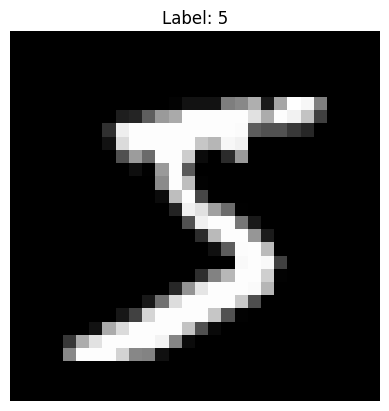

In [120]:
# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

## Preprocessing

For the MNIST dataset, we typically perform normalization to scale the pixel values to a range between 0 and 1, which helps improve the convergence of the neural network during training

This code snippet normalizes the pixel values of the training and test datasets by dividing them by 255.0, the maximum pixel value. As a result, the pixel values will be scaled to the range [0, 1].

In [121]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [122]:
# Print the minimum and maximum pixel values after normalization
table = tabulate([
    ["Minimum pixel value after normalization:", np.min(x_train)],
    ["Maximum pixel value after normalization:", np.max(x_train)],
    ["Mean pixel value after normalization:", np.mean(x_train)],
], tablefmt='fancy_grid')

print(table)

╒══════════════════════════════════════════╤══════════╕
│ Minimum pixel value after normalization: │ 0        │
├──────────────────────────────────────────┼──────────┤
│ Maximum pixel value after normalization: │ 1        │
├──────────────────────────────────────────┼──────────┤
│ Mean pixel value after normalization:    │ 0.130661 │
╘══════════════════════════════════════════╧══════════╛


## Approach 1: Neural Network

The next step is to define the model architecture. For this dataset, a simple feedforward neural network or a convolutional neural network (CNN) can work well.

For the first example we will first try with feedforward neural network

* Create a Sequential model, which is a linear stack of layers.
* Add a Flatten layer as the input layer to convert the 28x28 images into a 1D array.
* Add a Dense hidden layer with 128 neurons and ReLU activation.
* Add a Dense output layer with 10 neurons (since there are 10 classes in MNIST) and softmax activation, which outputs probabilities for each class.

You can adjust the number of neurons in the hidden layer or add more hidden layers to experiment with different architectures.

In [123]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Input

In [124]:
# Define the model architecture
model = Sequential([
    Input(shape=(28, 28)),  # Explicitly define the input shape,
    Flatten(),  # Flatten the 28x28 images into a vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

$$\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)$$

In [125]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model
Compiling the model involves specifying the loss function, the optimizer, and optional metrics that you want to track during training.

For the MNIST dataset, since it's a multi-class classification problem:
*  we'll use categorical cross-entropy as the loss function.
* We'll use the Adam optimizer, which is a popular choice for training neural networks.
* We'll also track accuracy as a metric.

In [126]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Optimization**: The optimizer specified during compilation determines how the model's weights will be updated based on the loss function and the gradients computed during training. Different optimizers have different update rules and convergence properties, so the choice of optimizer can impact the training process and the resulting model.

**Loss function**: The loss function measures how well the model performs on the training data. During training, the goal is to minimize this loss function, which means making the predictions of the model as close as possible to the true labels.

**Metrics**: Metrics are used to evaluate the performance of the model during training and/or evaluation. While the loss function is used to optimize the model, metrics provide additional insights into how well the model is performing, such as accuracy, precision, or recall.

In [127]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8682 - loss: 0.4683 - val_accuracy: 0.9627 - val_loss: 0.1303
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9599 - loss: 0.1346 - val_accuracy: 0.9728 - val_loss: 0.0965
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0879 - val_accuracy: 0.9750 - val_loss: 0.0889
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0627 - val_accuracy: 0.9748 - val_loss: 0.0833
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0500 - val_accuracy: 0.9775 - val_loss: 0.0869


* x_train and y_train are the training images and labels, respectively.
* We specify the number of epochs (iterations over the entire training dataset) as 5.
* validation_split=0.1 specifies that 10% of the training data will be used as validation data, allowing us to monitor the model's performance on data that it hasn't seen during training.

### Evaluation

In [128]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9702 - loss: 0.0887


In [129]:
table = tabulate([
    ["Test Loss", test_loss],
    ["Test Accuracy", test_accuracy]
], tablefmt='fancy_grid')

print(table)

╒═══════════════╤═══════════╕
│ Test Loss     │ 0.0767526 │
├───────────────┼───────────┤
│ Test Accuracy │ 0.9756    │
╘═══════════════╧═══════════╛


Text(0.5, 1.0, 'Training and Validation Accuracy')

<Figure size 640x480 with 0 Axes>

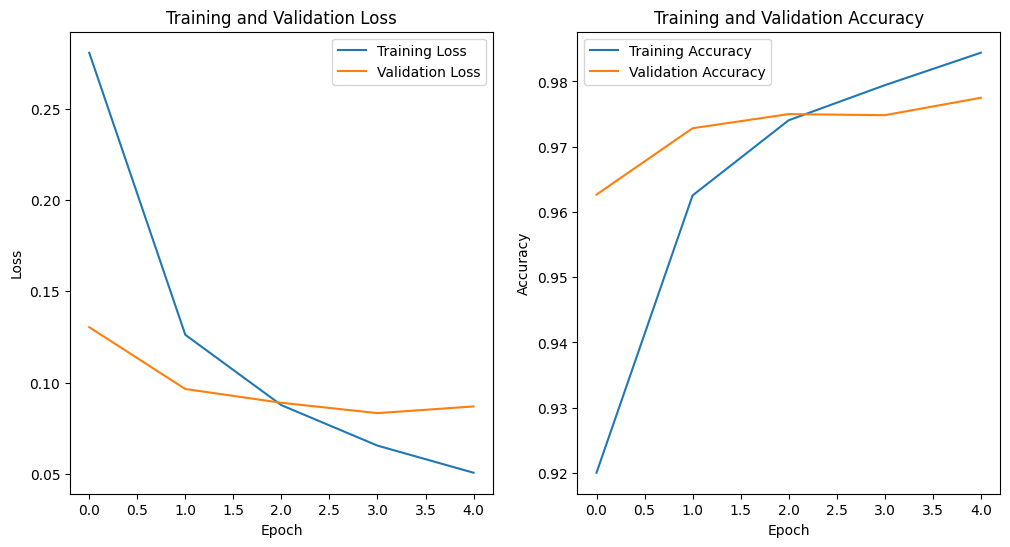

In [130]:
# Create subplots for loss and accuracy
plt.tight_layout()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training loss vs. validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Validation Loss')

# Plot training accuracy vs. validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Training and Validation Accuracy')

As seen the validation loss and accuracy start to diverge from the training loss and accuracy around the 1.9 epoch mark. This could indicate that the model may be starting to overfit to the training data.

To address this issue, we could try several approaches:

* Early stopping: Implement early stopping to halt the training process when the validation loss stops decreasing or starts to increase. This can prevent the model from overfitting to the training data.
* Regularization: Add regularization techniques such as dropout or L2 regularization to reduce overfitting.
* Reduce model complexity: Simplify the model architecture by reducing the number of layers or neurons. A simpler model may generalize better to unseen data.
* Increase training data: If possible, gather more training data to provide the model with a larger and more diverse set of examples.

### Improvement

In [131]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [132]:
# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9782 - val_loss: 0.0811
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9780 - val_loss: 0.0882
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9787 - val_loss: 0.0873
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9768 - val_loss: 0.0894


In [133]:
# Evaluate the model on the test data
test_loss_new, test_accuracy_new = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.9740 - loss: 0.0840


In [134]:
table = tabulate([
    ["Test Loss", test_loss, "Test Loss (ES)", test_loss_new, "Diff", (test_loss-test_accuracy_new)],
    ["Test Accuracy", test_accuracy, "Test Accu. (ES)", test_accuracy_new, "Diff", (test_accuracy-test_accuracy_new)]
], tablefmt='fancy_grid')

print(table)

╒═══════════════╤═══════════╤═════════════════╤═══════════╤══════╤═════════════╕
│ Test Loss     │ 0.0767526 │ Test Loss (ES)  │ 0.0725376 │ Diff │ -0.900847   │
├───────────────┼───────────┼─────────────────┼───────────┼──────┼─────────────┤
│ Test Accuracy │ 0.9756    │ Test Accu. (ES) │ 0.9776    │ Diff │ -0.00199997 │
╘═══════════════╧═══════════╧═════════════════╧═══════════╧══════╧═════════════╛


### Example

In [144]:
img = x_test[1]

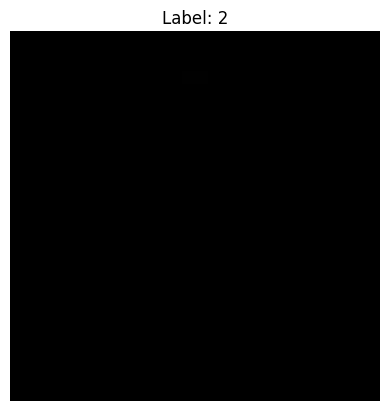

In [154]:
# Display the image
plt.imshow(Image.fromarray(img), cmap='gray')
plt.title(f"Label: {y_test[1]}")
plt.axis('off')
plt.show()

In [150]:
# Reshape the image to match the input shape expected by the model
image = np.expand_dims(x_test[0], axis=0)

# Perform prediction using the model
predictions = model.predict(image)

# Get the predicted class (digit)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [161]:
from sympy import Matrix, init_printing
init_printing()

display(Matrix(predictions))

[4.87925e-9  1.2773e-9  8.96309e-6  6.8544e-5  6.47189e-14  6.4919e-8  3.61887
e-14  0.999922  6.63078e-8  1.16877e-7]

In [153]:
print(f"predicted_class: {predicted_class}, actual: {y_test[0]}")

predicted_class: 7, actual: 7


### Further Improvements

Regularization Techniques:
* Dropout: Introduce dropout layers to randomly drop a fraction of neurons during training to prevent overfitting.
* L2 Regularization: Add L2 regularization to the model's layers to penalize large weights and encourage simpler models.
        Batch Normalization: Insert batch normalization layers to stabilize and speed up the training process.

Hyperparameter Tuning:
* Learning Rate: Experiment with different learning rates to find the optimal value for your model and dataset.
* Batch Size: Adjust the batch size to balance between computational efficiency and model performance.
* Number of Epochs: Fine-tune the number of epochs to prevent underfitting or overfitting.

Model Architecture:
* Add or Remove Layers: Experiment with adding or removing layers to adjust the model's complexity.
* Change Activation Functions: Try different activation functions to improve the model's performance.

Data Augmentation:
* Apply data augmentation techniques such as rotation, shifting, or scaling to increase the diversity of training examples and improve the model's generalization.

Transfer Learning:
* If applicable, leverage pre-trained models and transfer learning techniques to benefit from models trained on large datasets.

## Approach 2: Convolutional Neural Network

In this CNN architecture:

* We start with a Conv2D layer with 32 filters and a kernel size of (3, 3), followed by a ReLU activation function. The input shape is (28, 28, 1) since MNIST images are grayscale.
* We add a MaxPooling2D layer with a pool size of (2, 2) to downsample the spatial dimensions of the feature maps.
* We then add another Conv2D layer with 64 filters and a kernel size of (3, 3), followed by another MaxPooling2D layer.
* We flatten the feature maps to a 1D vector using a Flatten layer.
* Next, we add a fully connected Dense layer with 128 neurons and ReLU activation.
* Finally, we add an output Dense layer with 10 neurons (one for each digit) and softmax activation.

This CNN architecture is a common choice for image classification tasks and serves as a good starting point for the MNIST dataset.

In [162]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [163]:
# Define the model architecture
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/vk64lk/Documents/github/personal/mnist/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [164]:
# Compile the model
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [165]:
# Print the model summary
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [205]:
cnn_history = model_cnn.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9964 - loss: 0.0098 - val_accuracy: 0.9910 - val_loss: 0.0421
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9907 - val_loss: 0.0399
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9977 - loss: 0.0062 - val_accuracy: 0.9890 - val_loss: 0.0572
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9912 - val_loss: 0.0387
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9981 - loss: 0.0051 - val_accuracy: 0.9908 - val_loss: 0.0557


In [206]:
# Evaluate the model on the test data
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0450


Text(0.5, 1.0, 'Training and Validation Accuracy')

<Figure size 640x480 with 0 Axes>

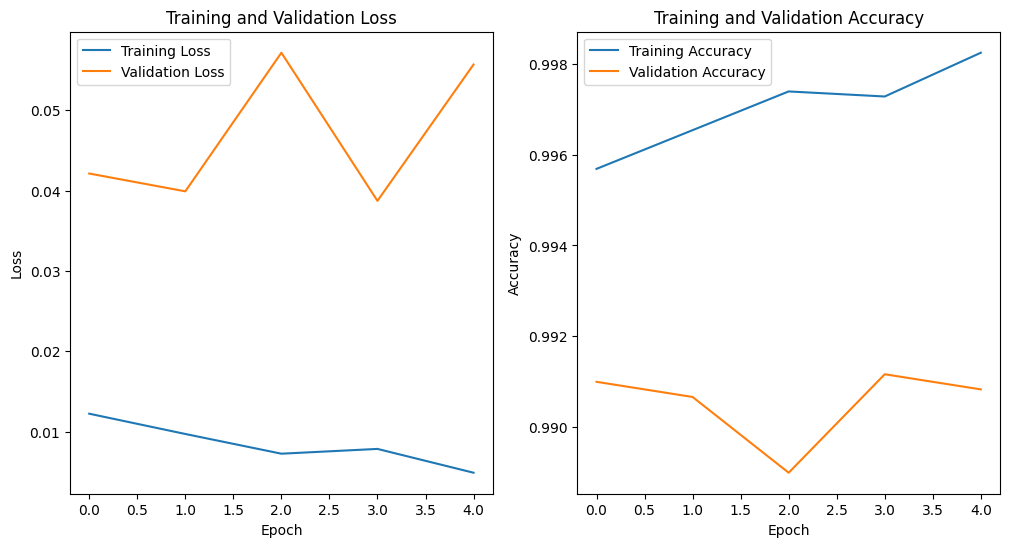

In [207]:
# Create subplots for loss and accuracy
plt.tight_layout()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training loss vs. validation loss
axs[0].plot(cnn_history.history['loss'], label='Training Loss')
axs[0].plot(cnn_history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Validation Loss')

# Plot training accuracy vs. validation accuracy
axs[1].plot(cnn_history.history['accuracy'], label='Training Accuracy')
axs[1].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Training and Validation Accuracy')

In [170]:
# Reshape the image to match the input shape expected by the model
image = np.expand_dims(x_test[0], axis=0)

# Perform prediction using the model
predictions = model_cnn.predict(image)

# Get the predicted class (digit)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [172]:
print(f"Actual Class: {y_test[0]}")
print(f"Predicted Class: {predicted_class}")

Actual Class: 7
Predicted Class: 7


## Results and Analysis

* We are interested the FFNN vs CNN performance
* We utilize the Classification Report (precision, recall, f1-score, support)

In [174]:
from sklearn.metrics import classification_report

### Feed Forward Neural Network

In [195]:
# run predictions for all test cases
y_pred_prop_nn = model.predict(x_test)

# Extract predicted classes
y_pred_nn = np.argmax(y_pred_prop_nn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


In [196]:
report_nn = classification_report(y_test, y_pred_nn)

In [197]:
print(report_nn)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Convolutional Neural Network

In [198]:
# run predictions for all test cases
y_pred_prob_cnn = model_cnn.predict(x_test)

# Extract predicted classes
y_pred = np.argmax(y_pred_prob_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [199]:
report_cnn = classification_report(y_test, y_pred)

In [200]:
print(report_cnn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

